In [11]:
#  Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
import os
os.environ["OMP_NUM_THREADS"] = "1"


In [12]:
#Load the Dataset
df = pd.read_csv("Wine_clust.csv")
print("First 5 rows of the dataset:")
df.head()

First 5 rows of the dataset:


,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [14]:
df.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline'],
      dtype='object')

In [15]:
df.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [6]:
#Data Preprocessing – Scaling

In [16]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
scaled_data

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [46]:
#K-Means Clustering


In [47]:
import warnings
warnings.filterwarnings("ignore", message="KMeans is known to have a memory leak")

inertia = []
silhouette = []
K = range(2, 11)

In [48]:
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(scaled_data, kmeans.labels_))

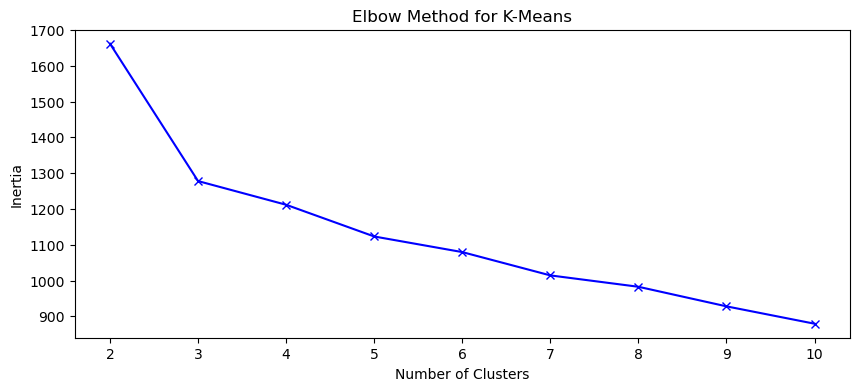

In [49]:
# Plot Elbow Curve
plt.figure(figsize=(10,4))
plt.plot(K, inertia, 'bx-')
plt.title('Elbow Method for K-Means')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [44]:
# Plot Silhouette Scores


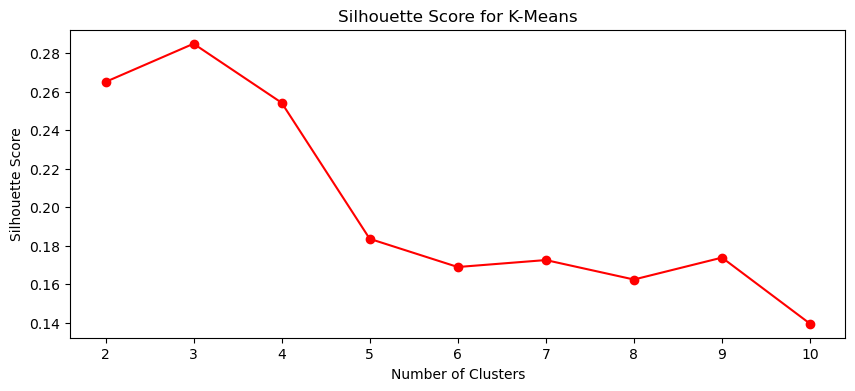

In [45]:
plt.figure(figsize=(10,4))
plt.plot(K, silhouette, 'ro-')
plt.title('Silhouette Score for K-Means')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [42]:
# Choose best K (highest silhouette)

In [43]:
best_k = K[np.argmax(silhouette)]
print(f"\n✅ Optimum number of clusters for K-Means: {best_k}")


✅ Optimum number of clusters for K-Means: 3


In [40]:
# Final K-Means model


In [41]:
kmeans = KMeans(n_clusters=best_k, random_state=42)
df['KMeans_Cluster'] = kmeans.fit_predict(scaled_data)
print("\nCluster value counts (KMeans):")
print(df['KMeans_Cluster'].value_counts())


Cluster value counts (KMeans):
KMeans_Cluster
0    65
2    62
1    51
Name: count, dtype: int64


In [37]:
# Agglomerative Clustering

In [38]:
agg = AgglomerativeClustering(n_clusters=best_k)
df['Agglomerative_Cluster'] = agg.fit_predict(scaled_data)
print("\nCluster value counts (Agglomerative):")
print(df['Agglomerative_Cluster'].value_counts())


Cluster value counts (Agglomerative):
Agglomerative_Cluster
2    64
0    58
1    56
Name: count, dtype: int64


In [34]:
#DBSCAN Clustering

In [35]:
dbscan = DBSCAN(eps=1.5, min_samples=5)
df['DBSCAN_Cluster'] = dbscan.fit_predict(scaled_data)
print("\nCluster value counts (DBSCAN):")
print(df['DBSCAN_Cluster'].value_counts())


Cluster value counts (DBSCAN):
DBSCAN_Cluster
-1    178
Name: count, dtype: int64


In [32]:
#Visualize the Clusters (KMeans example)

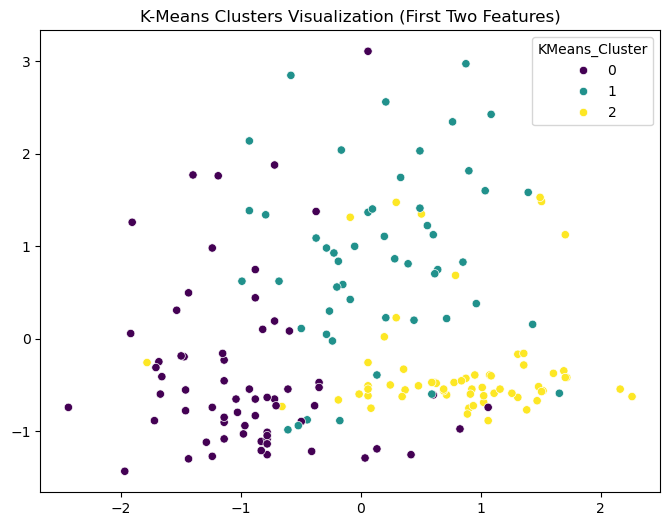

In [33]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=scaled_data[:,0], y=scaled_data[:,1], hue=df['KMeans_Cluster'], palette='viridis')
plt.title("K-Means Clusters Visualization (First Two Features)")
plt.show()

In [28]:
#  Display Final DataFrame


In [29]:
print("\nFinal dataset with cluster columns:")
display(df.head())


Final dataset with cluster columns:


,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,KMeans_Cluster,Agglomerative_Cluster,DBSCAN_Cluster
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,2,2,-1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,2,2,-1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,2,2,-1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,2,2,-1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,2,2,-1
